**CHURN MODELLING IN BANKING**

As we know, it is much more expensive to sign in a new client than keeping an existing one. It is advantageous for banks to know what leads a client towards the decision to leave the company. Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

In [125]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as po
import plotly.graph_objs as go
sns.set_style("darkgrid")

In [126]:
#Load Data Set.

churn_df = pd.read_csv("churn.csv")
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### General Information about the Dataset

In [127]:
#Check the format of the Data.
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [128]:
#Check For Missing Values
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [129]:
#Descriptive Statistics For the Categorical Fields
churn_df[['Geography','Gender']].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [130]:
#Descriptive Statistics for the dataset.
churn_df.drop(['Geography','Gender',"RowNumber","CustomerId"],axis=1).describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Summary Highlights:**

1. The bank has 10,000 customers
2. The dataset has 14 features, but RowNumber, CustomerID and Surname are removed.
3. There are no duplicate and no null value from the dataset
4. Most of the customers are located in France
5. Most of the customer's credit score is around 650 which considered as fair
6. Customer's age are vary, ranging from 18 to 92
7. The dataset only has tenure up to 10 years

## Exploratory Data Analysis

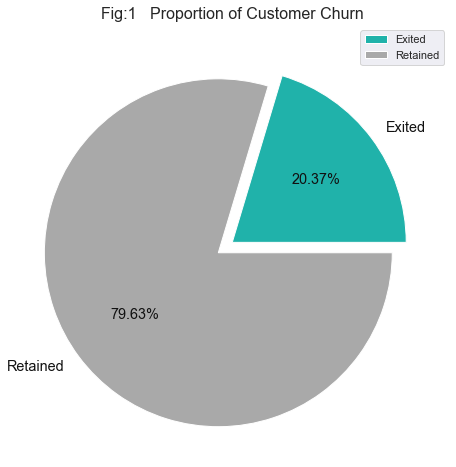

In [131]:
#Create a list that contains the number of exited customer 
ExitedList = [churn_df.Exited[churn_df['Exited']==1].count(), churn_df.Exited[churn_df['Exited']==0].count()]

#set figure size and title
plt.subplots(figsize=(8, 8))
plt.title('Fig:1   Proportion of Customer Churn', size = 16)

#display the proportion of Customer Churn
plt.pie(ExitedList,labels = ['Exited', 'Retained'], autopct='%.2f%%',
        explode = (0 ,0.10),textprops={'color':"#111",'size': "x-large"}, colors = ['lightseagreen','darkgrey'])
plt.legend(labels = ['Exited', 'Retained'], loc = "best",prop={'size': 11})
plt.show()


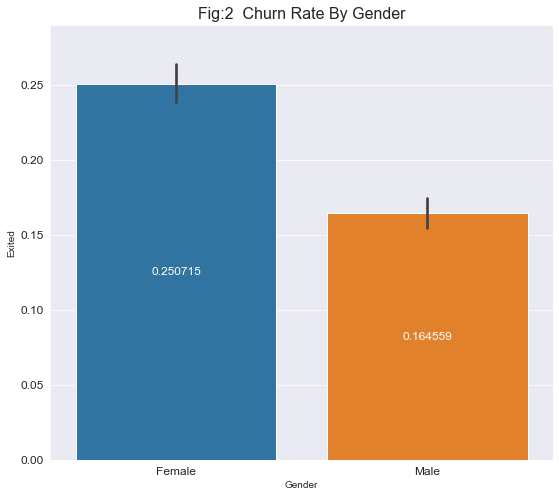

In [132]:
# plot data
import matplotlib 
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(9, 8))
plt.title('Fig:2  Churn Rate By Gender', size = 16)
g = sns.barplot(x="Gender",y="Exited",data=churn_df) 
# annotate
g.bar_label(ax.containers[0], label_type='center',fmt='%g',fontsize=12, color = "w")

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

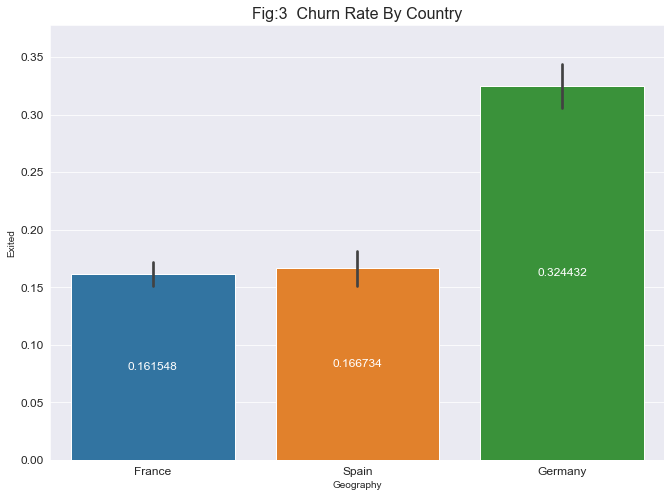

In [133]:
# plot data
import matplotlib 
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(11, 8))
plt.title('Fig:3  Churn Rate By Country', size = 16)
g = sns.barplot(x="Geography",y="Exited",data=churn_df) 
# annotate
g.bar_label(ax.containers[0], label_type='center',fmt='%g',fontsize=12, color = "w")

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)


**Summary highlights:**
1. 20.37 percent of customers left/exited the bank. **(Fig: 1)**

2. Despite the fact that there are more males than females in the summary statistics, females exited the bank at a rate of 25.07 %. **(Fig: 2)**

3. Despite having more customers in France, 30% of customers in Germany leave the bank. **(Fig: 3)**

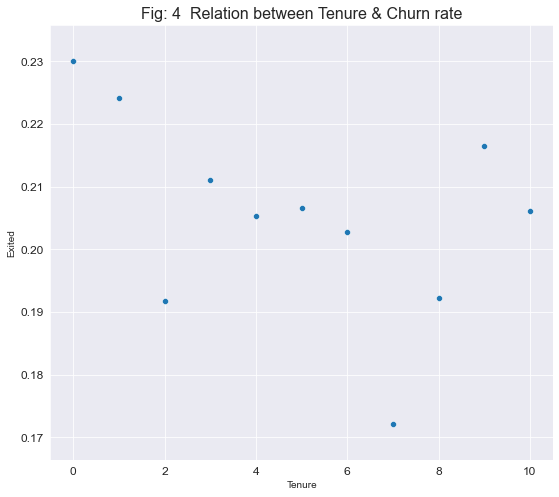

In [134]:
# Visualize Relation between Tenure & Churn rate
plot_by_tenure = churn_df.groupby('Tenure').Exited.mean().reset_index()
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(9, 8))
plt.title('Fig: 4  Relation between Tenure & Churn rate', size = 16)
g = sns.scatterplot(x=plot_by_tenure["Tenure"],y=plot_by_tenure["Exited"])

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

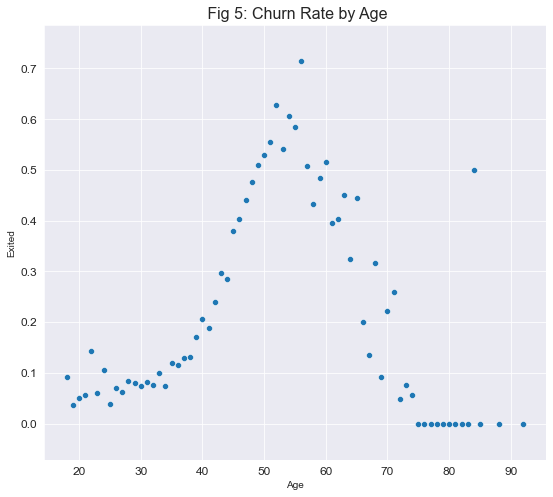

In [135]:
#Churn Rate by Age
plot_by_age = churn_df.groupby('Age').Exited.mean().reset_index()
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(9, 8))
plt.title(' Fig 5: Churn Rate by Age', size = 16)
g = sns.scatterplot(x=plot_by_age["Age"],y=plot_by_age["Exited"])

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

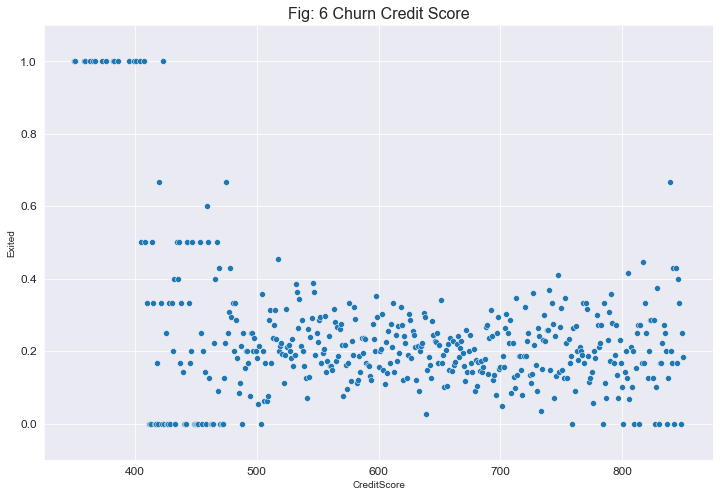

In [136]:
#Churn Rate by Credit Score
plot_by_score= churn_df.groupby('CreditScore').Exited.mean().reset_index()
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Fig: 6 Churn Credit Score', size = 16)
g = sns.scatterplot(x=plot_by_score["CreditScore"],y=plot_by_score["Exited"])

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

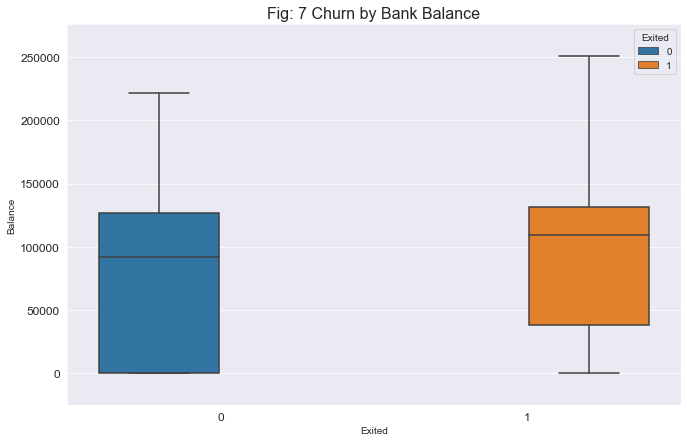

In [137]:
#Churn Rate by Credit Score
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(11, 7))
plt.title('Fig: 7 Churn by Bank Balance', size = 16)
g = sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = churn_df)

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

**Summary Highlights**
1. In terms of tenure, clients on either end of the spectrum (having spent little or a lot of time with the bank) are more likely to churn than those with an average tenure. **(Fig: 4)** 
2. Older customers aged 50-60 years old, despite constituting a small proportion of the customer base, have a proclivity to leave the bank **(Fig: 5)**
3. Customers with lower credit card scores are more likely to churn. **(Fig: 6)**

4. Worryingly, the bank is losing customers with large bank balances, which will reduce their available capital for lending. **(Fig: 7)**

Text(0.5, 1.0, 'Churn Rate By Product Type')

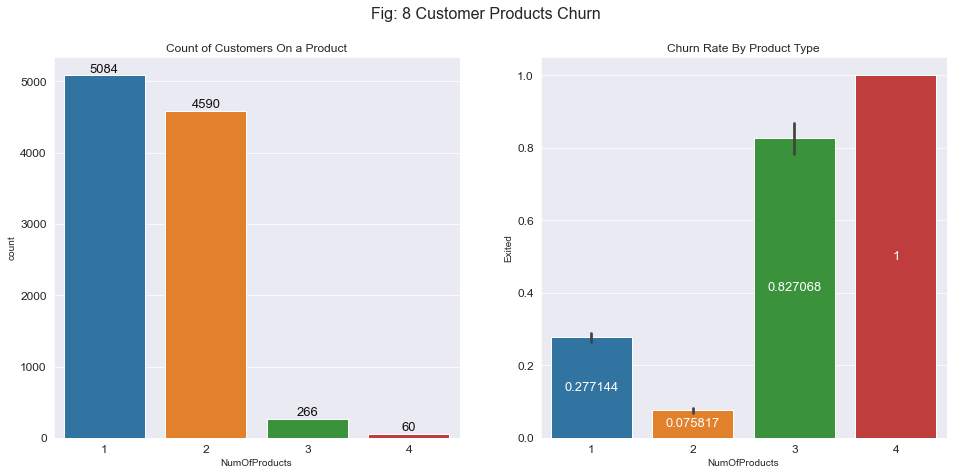

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Fig: 8 Customer Products Churn', size = 16)

# Count of Customers On a Product
g= sns.countplot(ax= axes[0], x="NumOfProducts",data=churn_df)
g.bar_label(axes[0].containers[0], label_type='edge',fmt='%g',fontsize=13, color = "#111")
axes[0].set_title("Count of Customers On a Product")

# Churn Rate By Product Type
a = sns.barplot(ax= axes[1], x="NumOfProducts",y="Exited",data=churn_df) 
a.bar_label(axes[1].containers[0], label_type='center',fmt="%g",fontsize=13, color = "w")
axes[1].set_title('Churn Rate By Product Type')


**Summary Highlights:**

Products 3 and 4 have more customer exit, despite the fact that they are used by a small number of customers. Products 1 and 2 are the most frequently used by customers, whereas products 3 and 4 are rarely used but have a higher exit rate.

**Recommendations**
1. Given the geography, customers in Germany have a high churn rate. The bank should concentrate on improving its facilities and services in Germany.

2. Older people (51-60) may require a better product or promotion, such as a better retirement plan, higher interest rate, or similar.

3. The bank should discontinue using products 3 and 4, as they are less likely to be chosen and have a high churn rate. As a result, the bank can concentrate on promoting products 1 and 2. Because the churn rate is quite high (27%), the company can review customer satisfaction and opinion for product number one.

**Note**

Because 20% of customers have churned, the baseline model may be able to predict that 20% of customers will churn. Given that 20% is a small number, we must ensure that the chosen model accurately predicts this 20%, as it is more important for the bank to identify and retain this group than it is to accurately predict the customers who are retained.

## Feature Engineering

### One-Hot Enconding

In [139]:
#Remove less Correlated Features
churn_df.drop(['RowNumber', 'Surname'],axis=1,inplace=True) 

In [140]:
#Perform One Hot Encoding using get_dummies method
churn_df = pd.get_dummies(churn_df, columns = ['Geography', 'Gender','HasCrCard', 'IsActiveMember',"NumOfProducts"],drop_first=True)

### MinMax Scaling 

In [141]:
# minMax scaling the continuous variables
continuous_vars =['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'] 
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
churn_df[continuous_vars]=pd.DataFrame(min_max.fit_transform(churn_df[continuous_vars]))
churn_df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,15634602,0.538,0.324324,0.2,0.000000,0.506735,1,0,0,0,1,1,0,0,0
1,15647311,0.516,0.310811,0.1,0.334031,0.562709,0,0,1,0,0,1,0,0,0
2,15619304,0.304,0.324324,0.8,0.636357,0.569654,1,0,0,0,1,0,0,1,0
3,15701354,0.698,0.283784,0.1,0.000000,0.469120,0,0,0,0,0,0,1,0,0
4,15737888,1.000,0.337838,0.2,0.500246,0.395400,0,0,1,0,1,1,0,0,0


### Resampling (undersampling) 

Because 20% of customers have churned, the baseline model may be able to predict that 20% of customers will churn. This is a problem since the data is imbalance. This will create a bias in our accuracy. To prevent this we will perform undersampling on our dataset.

In [142]:
# Checking the shape of the exited coulmn by class
churned = churn_df[churn_df['Exited']==1]
not_churn = churn_df[churn_df['Exited']==0]
print(churned.shape,not_churn.shape)

(2037, 15) (7963, 15)


In [143]:
#Create independent and Dependent Features
columns = churn_df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Exited"]]
# Store the variable we are predicting 
target = "Exited"
# Define a random state 
state = np.random.RandomState(42)
X = churn_df[columns]
Y = churn_df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(10000, 14)
(10000,)


In [144]:
from imblearn.under_sampling import NearMiss
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, Y)

In [145]:
X_res.shape,y_res.shape

((4074, 14), (4074,))

In [146]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 7963, 1: 2037})
Resampled dataset shape Counter({0: 2037, 1: 2037})


Once our data is balanced let's move on to build our machine learning model

## Model Building and Selection

In [147]:
#Create Feature variable X and Target variable y
y = y_res
X = X_res.drop(["CustomerId"], axis = 1)

In [148]:
#Split the data into training set (70%) and test set (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 50)

To choose the best model, seven classification models are compared and the best one is selected based on their accuracy score since the data is balanced

In [149]:
# Machine Learning classification model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

In [150]:
#Fit the logistic Regression Model
logit = LogisticRegression(random_state=50)
logit.fit(X_train,y_train)

#Predict the value for new, unseen data
pred = logit.predict(X_test)

# Find Accuracy using accuracy_score method
logit_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)
logit_recall = round(metrics.recall_score(y_test,pred)*100, 2)
logit_precision = round(metrics.precision_score(y_test,pred)*100, 2)
logit_f1 = round(metrics.f1_score(y_test,pred)*100, 2)



In [151]:
#Fit the Support Vector Machine Model
svcmodel = SVC(kernel='linear', random_state=50, probability=True)
svcmodel.fit(X_train,y_train)
#Predict the value for new, unseen data
svc_pred = svcmodel.predict(X_test)

# Find Accuracy using accuracy_score method
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)
svc_recall = round(metrics.recall_score(y_test,svc_pred)*100, 2)
svc_f1 = round(metrics.f1_score(y_test,svc_pred)*100, 2)

In [152]:
#Fit the K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 represents Euclidean distance, p=1 represents Manhattan Distance
knnmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
knn_pred = knnmodel.predict(X_test)

# Find Accuracy using accuracy_score method
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)
knn_recall = round(metrics.recall_score(y_test,knn_pred)*100, 2)
knn_precision = round(metrics.precision_score(y_test,knn_pred)*100, 2)
knn_f1 = round(metrics.f1_score(y_test,knn_pred)*100, 2)

In [153]:
#Fit the Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion = "gini", random_state = 50)
dtmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
dt_pred = dtmodel.predict(X_test)

# Find Accuracy using accuracy_score method
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)
dt_recall = round(metrics.recall_score(y_test,dt_pred)*100, 2)
dt_precision = round(metrics.precision_score(y_test,dt_pred)*100, 2)
dt_f1 = round(metrics.f1_score(y_test,dt_pred)*100, 2)

In [154]:
#Fit the Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
rf_pred = rfmodel.predict(X_test)

# Find Accuracy using accuracy_score method
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)
rf_recall = round(metrics.recall_score(y_test,rf_pred)*100, 2)
rf_precision = round(metrics.precision_score(y_test,rf_pred)*100, 2)
rf_f1 = round(metrics.f1_score(y_test,rf_pred)*100, 2)

In [155]:
#Fit the XgBoost Classifier 
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

#Predict the value for new, unseen data
xg_pred = model.predict(X_test)

# Find Accuracy using accuracy_score method
xg_accuracy = round(metrics.accuracy_score(y_test, xg_pred) * 100, 2)
xg_recall = round(metrics.recall_score(y_test,xg_pred)*100, 2)
xg_precision = round(metrics.precision_score(y_test,xg_pred)*100, 2)
xg_f1 = round(metrics.f1_score(y_test,xg_pred)*100, 2)

In [156]:
#Fit the Naive Bayes Classifier
bcmodel = GaussianNB()
bcmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
bc_pred = bcmodel.predict(X_test)

# Find Accuracy using accuracy_score method
bc_accuracy = round(metrics.accuracy_score(y_test, bc_pred) * 100, 2)
bc_recall = round(metrics.recall_score(y_test,bc_pred)*100, 2)
bc_precision = round(metrics.precision_score(y_test,bc_pred)*100, 2)
bc_f1 = round(metrics.f1_score(y_test,bc_pred)*100, 2)


In [157]:
# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest',"XGBoost","NaiveBayes Classifier"],
    'Accuracy': [logit_accuracy, svc_accuracy, knn_accuracy, 
              dt_accuracy, rf_accuracy,xg_accuracy, bc_accuracy,]})
Model_Comparison_df = Model_Comparison.sort_values(by='Accuracy', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Accuracy')
Model_Comparison_df.reset_index()

,Accuracy,Model
0,77.19,Random Forest
1,75.88,Logistic Regression
2,75.88,XGBoost
3,75.80,Support Vector Machine
4,71.55,K-Nearest Neighbor
5,70.07,Decision Tree
6,55.68,NaiveBayes Classifier


From the Model comparison above Random Forest had the highest accuracy score, before making predictions with it we will plot the confusion matrix to see how well the model did in predictions.

<AxesSubplot:>

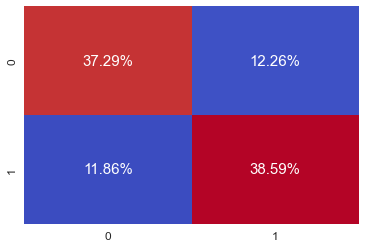

In [158]:
#Generate confusion matrix for the RandomForest model as it has maximum Accuracy
from sklearn.metrics import confusion_matrix
conf_mat_rfmodel = confusion_matrix(y_test,pred)
sns.heatmap(conf_mat_rfmodel/np.sum(conf_mat_rfmodel),annot = True,fmt='.2%',cmap = "coolwarm",cbar = False,annot_kws={'fontsize': 15,  'color':'w'})

**Summary of Model Performance**

This confusion matrix compares "true" values to what our random forest model predicted, and it is interpreted as follows: each quadrant represents all conceivable scenarios that our model might have predicted and compares them to the actual data. Quadrant II (top left) represents the cases where the random forest model correctly predicted no churn and no churn really occurred in real life (37.29 % of total test population) - these are also known as False Positives since we have correctly recognized negative values. Quadrant IV (bottom right) - quantify the percent of times when a customer effectively churned and our model projected that it would churn — these are known as True Positives and account for 38.59 %. In contrast, Quadrant I ( upper right) and Quadrant III (bottom left) demonstrate the model's level of inaccuracy. In other words, 12.26% of the overall population would fall into the area where our model predicted individuals would leave but they did not. Diametrically, Quadrant III shows that the model incorrectly classified 11.86% of the overall population as non-churned. By adding the percentages of Quadrants I and III and comparing them to the percentages of Quadrants II and IV, we may infer that our model is accurate 76% of the time but incorrect 24% of the time. Given the different scenarios and interpretabilities that the matrix generates, you may have noticed why it is called a confusion matrix by now, but I hope that my explanation was simple enough to help you understand the overall concept.

### CHECKING FOR OVER FITTING AND UNDERFITTING

In [159]:
#accuracy of test data
rf_pred = rfmodel.predict(X_test)
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)

#accuracy of train data
rf_pred1 = rfmodel.predict(X_train)
rf_accuracy2 = round(metrics.accuracy_score(y_train, rf_pred1) * 100, 2)

print("accuracy of test data:",rf_accuracy,"%")
print("accuracy of train data:",rf_accuracy2,"%")

accuracy of test data: 77.19 %
accuracy of train data: 100.0 %


Before we use this model for prediction, we need to check whether our model is overfitting or underfitting.From our result we found out that the model is overfitting, this is a bad indication, since our train set has a 100% accuracy, the model will perform poorly in unseen data. So we solve this problem by performing random forest hyperparameter tuning with GridSearchCV

### Random Forest hyperparameter tuning with GridSearchCV

In [160]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [161]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [162]:
#Initialize  random forest model.
rf_Model = RandomForestClassifier()

In [163]:
#Genrate a GridSearchCV with random forest as the estimator, and a cross validation of 3
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [164]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


c:\Users\David Sanchez Jnr\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [165]:
#accuracy of test data
rf_Grid_pred1 = rf_Grid.predict(X_test)
rf_Grid_accuracy1 = round(metrics.accuracy_score(y_test,rf_Grid_pred1) * 100, 2)

#accuracy of train data
rf_Grid_pred2 = rf_Grid.predict(X_train)
rf_Grid_accuracy2 = round(metrics.accuracy_score(y_train, rf_Grid_pred2) * 100, 2)

print("accuracy of test data:",rf_Grid_accuracy1,"%")
print("accuracy of train data:",rf_Grid_accuracy2,"%")

accuracy of test data: 76.86 %
accuracy of train data: 78.53 %


**Summary**

We can see that Random Forest hyperparameter tuning with GridSearchCV, seems to solve this problem, we can see that the model is moderately accurate due to the undersamping technique used, but to improve on the overall performance of the model, we can use a large dataset. i.e: to increase our sample size.

## Predictions

We will use the improved model for our predictions. We will then set our threshold probability value to 0.5, and segregate the customers into two. Those with probability of value greater than or equal to 0.5, will be predicted as likely to churn and vice versa.

In [166]:
# Predict the probability of Churn of each customer
churn_df['Probability_of_Churn'] = rf_Grid.predict_proba(churn_df[X_test.columns])[:,1]

In [167]:
# Create a Dataframe showcasing probability of Churn of each customer
a = churn_df[['CustomerId','Probability_of_Churn']]

In [168]:
#  Customers which are more likely to churn
likely_churn =  a[(a["Probability_of_Churn"]>0.5) & (a["Probability_of_Churn"]<0.99)]
likely_churn.sort_values(by=['Probability_of_Churn'], inplace=True,ascending=False)
likely_churn.to_csv("likely_churn.csv")

c:\Users\David Sanchez Jnr\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [169]:
# Customers less likely to churn
less_churn =  a[(a["Probability_of_Churn"]<=0.5) & (a["Probability_of_Churn"]>0)]
less_churn.sort_values(by=['Probability_of_Churn'], inplace=True,ascending=True)
less_churn.to_csv("less_churn.csv")